In [1]:
#Configurazione 3
%matplotlib inline   
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#RIMPIAZZANDO I PREZZI
df = pd.read_csv('training.csv') 

#REPLACE MISSING VALUES & OUTLIERS in un colpo solo...
#Rimpiazzo gli 0 e 1 dei valori di MMR con np.nan e poi rimpiazzo con la media fatta rispetto a, dapprima Make, Model e SubModel
#(di cui se ne trovano la maggior parte), poi Make e Model, e poi Make per i pochi rimasti
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].replace(0, np.nan)
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].replace(1, np.nan)

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].replace(0, np.nan)
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].replace(1, np.nan)

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].replace(0, np.nan)
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].replace(1, np.nan)

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].replace(0, np.nan)
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].replace(1, np.nan)

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].replace(0, np.nan)
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].replace(1, np.nan)

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].replace(0, np.nan)
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].replace(1, np.nan)

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].replace(0, np.nan)
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].replace(1, np.nan)

df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].replace(0, np.nan)
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].replace(1, np.nan)

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

#Sostituzione missing values colonna TopThreeAmericanName
df.loc[15769,'TopThreeAmericanName']='GM' 
df.loc[18532,'TopThreeAmericanName']='CHRYSLER'
df.loc[20016,'TopThreeAmericanName']='CHRYSLER'
df.loc[35157,'TopThreeAmericanName']='CHRYSLER'

#Rimpiazzo i valori nulli di Nationality con AMERICAN perche' i 4 che mancavano di TopThreeAmericanName erano tutti americani
df['Nationality'] = df['Nationality'].fillna('AMERICAN')

#IMPORTANTE: Siccome le righe con valori nulli di Color e SubModel sono gli stessi (e sono solo 7) li togliamo:
df=df.dropna(subset=['SubModel', 'Color']) 

#Rimpiazzati i missing values di Transmission (con la moda fra le macchine dello stesso modello (e stesso Make))
df['Transmission'] = df['Transmission'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mode()[0])) #faccio la moda perche' sono 'Transimission' stringhe

#Convertito la colonna Trim a stringa (c'erano dei valori interi che impedivano di calcolare la moda)
df['Trim']=df['Trim'].astype(str) 
df['Trim'] = df['Trim'].replace('nan', np.nan)
#Rimpiazzato i missing values della colonna Trim con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
df['Trim'] = df.groupby(['Make','Model', 'SubModel']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['Trim'] = df.groupby(['Make','Model']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['Trim'] = df.groupby('Make').Trim.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)

#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make Model (molto precisa)
df['WheelType']=df['WheelType'].astype(str) 
df['WheelType'] = df['WheelType'].replace('nan', 'ValoreNulloWheelType')
#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
#df['WheelType'] = df.groupby(['Make','Model','SubModel']).WheelType.apply(
  #  lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)
#df['WheelType'] = df.groupby(['Make','Size']).WheelType.apply(
 #   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)
#df['WheelType'] = df.groupby('Make').WheelType.apply(
#    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)


#eliminiamo Primeunit e AUCGUART perche' mancano 55703 valori
df = df.drop(['PRIMEUNIT', 'AUCGUART'], axis=1)

#eliminiamo BYRNO, RefId, VNZIP1 e WheelTypeID perche' non forniscono informazione
df = df.drop(['BYRNO', 'RefId','WheelTypeID'], axis=1)

#Togliamo le righe che hanno Size o Trim np.nan (4 di Size e 1 di Trim)
df=df.dropna(subset=['Size','Trim'])

#Outlier: c'e' un valore di VehBCost uguale a 1. Lo trattiamo come un outlier sostituendolo con la media fatta raggruppando su Make e Model
df['VehBCost'] = df['VehBCost'].replace(1, np.nan)
df['VehBCost'] = df['VehBCost'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df=df[df['VehicleAge']>0] #Tolgo una riga con VehicleAge=0 sennò non posso calcolare MilesPerYear
#Aggiunta di una nuova colonna
df['MilesPerYear'] = df['VehOdo'] / df['VehicleAge']
#------------------------------------------- CLASSIFICATION -------------------------------------------------------------

#eliminazione classe da predire
classes = df['IsBadBuy'] 

#df['Month'] = df['PurchDate'][1]

#sostituzione attributi non numerici con attributi numerici, e cancellazione delle colonne non utili per il cluster
#del df['PurchDate']
#del df['SubModel'] #son troppi
#del df['Model']
#del df['TopThreeAmericanName']
#del df['VNST']
#del df['Color']
#del df['Trim']
#del df['WheelType']
#del df['IsOnlineSale']
#del df['VehYear']
df['AcquisitionAveragePrice']=(df['MMRAcquisitionAuctionAveragePrice']+df['MMRAcquisitionAuctionCleanPrice']+df['MMRAcquisitionRetailAveragePrice']+df['MMRAcquisitonRetailCleanPrice'])/4.0
df['CurrentAveragePrice']=(df['MMRCurrentAuctionAveragePrice']+df['MMRCurrentAuctionCleanPrice']+df['MMRCurrentRetailAveragePrice']+df['MMRCurrentRetailCleanPrice'])/4.0
#del df['MMRAcquisitionAuctionAveragePrice']
#del df['MMRAcquisitionAuctionCleanPrice'] 
#del df['MMRAcquisitionRetailAveragePrice']
#del df['MMRAcquisitonRetailCleanPrice']
#del df['MMRCurrentAuctionAveragePrice']
#del df['MMRCurrentAuctionCleanPrice']
#del df['MMRCurrentRetailAveragePrice']
#del df['MMRCurrentRetailCleanPrice']
#del df['Make']

dt = pd.read_csv('test.csv') 

#REPLACE MISSING VALUES & OUTLIERS in un colpo solo...
#Rimpiazzo gli 0 e 1 dei valori di MMR con np.nan e poi rimpiazzo con la media fatta rispetto a, dapprima Make, Model e SubModel
#(di cui se ne trovano la maggior parte), poi Make e Model, e poi Make per i pochi rimasti
dt['MMRAcquisitionAuctionAveragePrice'] = dt['MMRAcquisitionAuctionAveragePrice'].replace(0, np.nan)
dt['MMRAcquisitionAuctionAveragePrice'] = dt['MMRAcquisitionAuctionAveragePrice'].replace(1, np.nan)

dt['MMRAcquisitionAuctionAveragePrice'] = dt['MMRAcquisitionAuctionAveragePrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRAcquisitionAuctionCleanPrice'] = dt['MMRAcquisitionAuctionCleanPrice'].replace(0, np.nan)
dt['MMRAcquisitionAuctionCleanPrice'] = dt['MMRAcquisitionAuctionCleanPrice'].replace(1, np.nan)

dt['MMRAcquisitionAuctionCleanPrice'] = dt['MMRAcquisitionAuctionCleanPrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRAcquisitionRetailAveragePrice'] = dt['MMRAcquisitionRetailAveragePrice'].replace(0, np.nan)
dt['MMRAcquisitionRetailAveragePrice'] = dt['MMRAcquisitionRetailAveragePrice'].replace(1, np.nan)

dt['MMRAcquisitionRetailAveragePrice'] = dt['MMRAcquisitionRetailAveragePrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRAcquisitonRetailCleanPrice'] = dt['MMRAcquisitonRetailCleanPrice'].replace(0, np.nan)
dt['MMRAcquisitonRetailCleanPrice'] = dt['MMRAcquisitonRetailCleanPrice'].replace(1, np.nan)

dt['MMRAcquisitonRetailCleanPrice'] = dt['MMRAcquisitonRetailCleanPrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRCurrentAuctionAveragePrice'] = dt['MMRCurrentAuctionAveragePrice'].replace(0, np.nan)
dt['MMRCurrentAuctionAveragePrice'] = dt['MMRCurrentAuctionAveragePrice'].replace(1, np.nan)

dt['MMRCurrentAuctionAveragePrice'] = dt['MMRCurrentAuctionAveragePrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRCurrentAuctionCleanPrice'] = dt['MMRCurrentAuctionCleanPrice'].replace(0, np.nan)
dt['MMRCurrentAuctionCleanPrice'] = dt['MMRCurrentAuctionCleanPrice'].replace(1, np.nan)

dt['MMRCurrentAuctionCleanPrice'] = dt['MMRCurrentAuctionCleanPrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRCurrentRetailAveragePrice'] = dt['MMRCurrentRetailAveragePrice'].replace(0, np.nan)
dt['MMRCurrentRetailAveragePrice'] = dt['MMRCurrentRetailAveragePrice'].replace(1, np.nan)

dt['MMRCurrentRetailAveragePrice'] = dt['MMRCurrentRetailAveragePrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
dt['MMRCurrentRetailCleanPrice'] = dt['MMRCurrentRetailCleanPrice'].replace(0, np.nan)
dt['MMRCurrentRetailCleanPrice'] = dt['MMRCurrentRetailCleanPrice'].replace(1, np.nan)

dt['MMRCurrentRetailCleanPrice'] = dt['MMRCurrentRetailCleanPrice'].groupby([
    dt['Make'], dt['Model'], dt['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------

dt['MMRAcquisitionAuctionAveragePrice'] = dt['MMRAcquisitionAuctionAveragePrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitionAuctionCleanPrice'] = dt['MMRAcquisitionAuctionCleanPrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitionRetailAveragePrice'] = dt['MMRAcquisitionRetailAveragePrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitonRetailCleanPrice'] = dt['MMRAcquisitonRetailCleanPrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentAuctionAveragePrice'] = dt['MMRCurrentAuctionAveragePrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentAuctionCleanPrice'] = dt['MMRCurrentAuctionCleanPrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentRetailCleanPrice'] = dt['MMRCurrentRetailCleanPrice'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentRetailAveragePrice'] = dt['MMRCurrentRetailAveragePrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitionAuctionAveragePrice'] = dt['MMRAcquisitionAuctionAveragePrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitionAuctionCleanPrice'] = dt['MMRAcquisitionAuctionCleanPrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitionRetailAveragePrice'] = dt['MMRAcquisitionRetailAveragePrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRAcquisitonRetailCleanPrice'] = dt['MMRAcquisitonRetailCleanPrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentAuctionAveragePrice'] = dt['MMRCurrentAuctionAveragePrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

dt['MMRCurrentAuctionCleanPrice'] = dt['MMRCurrentAuctionCleanPrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))#

dt['MMRCurrentRetailCleanPrice'] = dt['MMRCurrentRetailCleanPrice'].groupby(
    dt['Make']).apply(lambda x: x.fillna(
    x.mean()))

#IMPORTANTE: Togliamo la riga con tutti i problemi
dt=dt.dropna(subset=['SubModel']) 

#Convertito la colonna Trim a stringa (c'erano dei valori interi che impedivano di calcolare la moda)
dt['Trim']=dt['Trim'].astype(str) 
#Rimpiazzato i missing values della colonna Trim con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
dt['Trim'] = dt.groupby(['Make','Model', 'SubModel']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
dt['Trim'] = dt.groupby(['Make','Model']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
dt['Trim'] = dt.groupby('Make').Trim.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)

#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make Model (molto precisa)
dt['WheelType']=dt['WheelType'].astype(str) 
dt['WheelType'] = dt['WheelType'].replace('nan', 'ValoreNulloWheelType')
#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
#df['WheelType'] = df.groupby(['Make','Model','SubModel']).WheelType.apply(
  #  lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)
#df['WheelType'] = df.groupby(['Make','Size']).WheelType.apply(
 #   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)
#df['WheelType'] = df.groupby('Make').WheelType.apply(
#    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)

#eliminiamo Primeunit e AUCGUART perche' mancano 55703 valori
dt = dt.drop(['PRIMEUNIT', 'AUCGUART'], axis=1)

#eliminiamo BYRNO, RefId, VNZIP1 e WheelTypeID perche' non forniscono informazione
dt = dt.drop(['BYRNO', 'RefId','WheelTypeID'], axis=1)

#Togliamo le righe che hanno Size o Trim np.nan (4 di Size e 1 di Trim)
dt=dt.dropna(subset=['Size','Trim'])

#Outlier: c'e' un valore di VehBCost uguale a 1. Lo trattiamo come un outlier sostituendolo con la media fatta raggruppando su Make e Model
dt['VehBCost'] = dt['VehBCost'].replace(1, np.nan)
dt['VehBCost'] = dt['VehBCost'].groupby([
    dt['Make'], dt['Model']]).apply(lambda x: x.fillna(
    x.mean()))


dt=dt[dt['VehicleAge']>0] #Tolgo una riga con VehicleAge=0 sennò non posso calcolare MilesPerYear
#Aggiunta di una nuova colonna
#Aggiunta di una nuova colonna
dt['MilesPerYear'] = dt['VehOdo'] / dt['VehicleAge']


#dt.describe()
#dt.isnull().sum()

#------------------------------------------- CLASSIFICATION -------------------------------------------------------------

#eliminazione classe da predire
classes = dt['IsBadBuy'] 


#sostituzione attributi non numerici con attributi numerici, e cancellazione delle colonne non utili per il cluster
#del dt['PurchDate']
#del dt['SubModel'] #son troppi
#del dt['Model']
#del dt['TopThreeAmericanName']
#del dt['VNST']
#del dt['Color']
#del dt['Trim']
#del dt['WheelType']
#del dt['IsOnlineSale']
#del dt['VehYear']
                                                    #MEDIE PREZZI
dt['AcquisitionAveragePrice']=(dt['MMRAcquisitionAuctionAveragePrice']+dt['MMRAcquisitionAuctionCleanPrice']+dt['MMRAcquisitionRetailAveragePrice']+dt['MMRAcquisitonRetailCleanPrice'])/4.0
dt['CurrentAveragePrice']=(dt['MMRCurrentAuctionAveragePrice']+dt['MMRCurrentAuctionCleanPrice']+dt['MMRCurrentRetailAveragePrice']+dt['MMRCurrentRetailCleanPrice'])/4.0
#del dt['MMRAcquisitionAuctionAveragePrice']
#del dt['MMRAcquisitionAuctionCleanPrice'] 
#del dt['MMRAcquisitionRetailAveragePrice']
#del dt['MMRAcquisitonRetailCleanPrice']
#del dt['MMRCurrentAuctionAveragePrice']
#del dt['MMRCurrentAuctionCleanPrice']
#del dt['MMRCurrentRetailAveragePrice']
#del dt['MMRCurrentRetailCleanPrice']
#del dt['Make']

In [2]:
import datetime   #Aggiungiamo colonna mese e cancelliamo data (così rimangono Year e Month)
df['data']=pd.to_datetime(df.PurchDate)
df['Month']=df.data.dt.month
df['Day'] = df.data.dt.day
del df['data']
del df['PurchDate']
def rapporto(col1:str, col2:str, df):
    return df[col1] / df[col2]
 
df['WarrantyCost_f_VehBCost'] = rapporto('WarrantyCost', 'VehBCost', df)
df['VehBCost_f_VehOdo'] = rapporto('VehBCost', 'VehOdo', df)
df['VehBCost_f_VehicleAge'] = rapporto('VehBCost', 'VehicleAge', df)
#----------------------------------------------------TEST----------------------------------------------------------------------

dt['data']=pd.to_datetime(dt.PurchDate)
dt['Month']=dt.data.dt.month
dt['Day'] = dt.data.dt.day
del dt['data']
del dt['PurchDate']
dt['WarrantyCost_f_VehBCost'] = rapporto('WarrantyCost', 'VehBCost', dt)
dt['VehBCost_f_VehOdo'] = rapporto('VehBCost', 'VehOdo', dt)
dt['VehBCost_f_VehicleAge'] = rapporto('VehBCost', 'VehicleAge', dt)

#Nuovi attributi numerici con differenze tra Current e Acquisition


df['DiffAcquisitionAuctionAverage1']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRAcquisitionAuctionCleanPrice']
df['DiffAcquisitionAuctionAverage2']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRAcquisitionRetailAveragePrice']
df['DiffAcquisitionAuctionAverage3']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRAcquisitonRetailCleanPrice']
df['DiffAcquisitionAuctionAverage4']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRCurrentAuctionAveragePrice']
df['DiffAcquisitionAuctionAverage5']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRCurrentAuctionCleanPrice']
df['DiffAcquisitionAuctionAverage6']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRCurrentRetailAveragePrice']
df['DiffAcquisitionAuctionAverage7']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRCurrentRetailCleanPrice']

df['DiffAcquisitionAuctionClean1']=df['MMRAcquisitionAuctionCleanPrice']-df['MMRAcquisitionRetailAveragePrice']
df['DiffAcquisitionAuctionClean2']=df['MMRAcquisitionAuctionCleanPrice']-df['MMRAcquisitonRetailCleanPrice']
df['DiffAcquisitionAuctionClean3']=df['MMRAcquisitionAuctionCleanPrice']-df['MMRCurrentAuctionAveragePrice']
df['DiffAcquisitionAuctionClean4']=df['MMRAcquisitionAuctionCleanPrice']-df['MMRCurrentAuctionCleanPrice']
df['DiffAcquisitionAuctionClean5']=df['MMRAcquisitionAuctionCleanPrice']-df['MMRCurrentRetailAveragePrice']
df['DiffAcquisitionAuctionClean6']=df['MMRAcquisitionAuctionCleanPrice']-df['MMRCurrentRetailCleanPrice']

df['DiffAcquisitionRetailAverage1']=df['MMRAcquisitionRetailAveragePrice']-df['MMRAcquisitonRetailCleanPrice']
df['DiffAcquisitionRetailAverage2']=df['MMRAcquisitionRetailAveragePrice']-df['MMRCurrentAuctionAveragePrice']
df['DiffAcquisitionRetailAverage3']=df['MMRAcquisitionRetailAveragePrice']-df['MMRCurrentAuctionCleanPrice']
df['DiffAcquisitionRetailAverage4']=df['MMRAcquisitionRetailAveragePrice']-df['MMRCurrentRetailAveragePrice']
df['DiffAcquisitionRetailAverage5']=df['MMRAcquisitionRetailAveragePrice']-df['MMRCurrentRetailCleanPrice']

df['DiffAcquisitionRetailClean1']=df['MMRAcquisitonRetailCleanPrice']-df['MMRCurrentAuctionAveragePrice']
df['DiffAcquisitionRetailClean2']=df['MMRAcquisitonRetailCleanPrice']-df['MMRCurrentAuctionCleanPrice']
df['DiffAcquisitionRetailClean3']=df['MMRAcquisitonRetailCleanPrice']-df['MMRCurrentRetailAveragePrice']
df['DiffAcquisitionRetailClean4']=df['MMRAcquisitonRetailCleanPrice']-df['MMRCurrentRetailCleanPrice']

df['DiffCurrentAuctionAverage1']=df['MMRCurrentAuctionAveragePrice']-df['MMRCurrentAuctionCleanPrice']
df['DiffCurrentAuctionAverage2']=df['MMRCurrentAuctionAveragePrice']-df['MMRCurrentRetailAveragePrice']
df['DiffCurrentAuctionAverage3']=df['MMRCurrentAuctionAveragePrice']-df['MMRCurrentRetailCleanPrice']

df['DiffCurrentAuctionClean1']=df['MMRCurrentAuctionCleanPrice']-df['MMRCurrentRetailAveragePrice']
df['DiffCurrentAuctionClean2']=df['MMRCurrentAuctionCleanPrice']-df['MMRCurrentRetailCleanPrice']

df['DiffCurrentRetailAverage1']=df['MMRCurrentRetailAveragePrice']-df['MMRCurrentRetailCleanPrice']

#VehBCost
df['DiffVehBCURRENTAuctionAverage']=df['VehBCost']-df['MMRCurrentAuctionAveragePrice']
df['DiffVehBCURRENTAuctionClean']=df['VehBCost']-df['MMRCurrentAuctionCleanPrice']
df['DiffVehBCURRENTRetailAverage']=df['VehBCost']-df['MMRCurrentRetailAveragePrice']
df['DiffVehBCURRENTRetailClean']=df['VehBCost']-df['MMRCurrentRetailCleanPrice']

#Nuovi attributi numerici con differenze tra VehBCost e Acquisition
df['DiffVehBACQUISITIONAuctionAverage']=df['VehBCost']-df['MMRAcquisitionAuctionAveragePrice']
df['DiffVehBACQUISITIONAuctionClean']=df['VehBCost']-df['MMRAcquisitionAuctionCleanPrice']
df['DiffVehBACQUISITIONRetailAverage']=df['VehBCost']-df['MMRAcquisitionRetailAveragePrice']
df['DiffVehBACQUISITIONRetailClean']=df['VehBCost']-df['MMRAcquisitonRetailCleanPrice']

#---------------------------------------------------- TEST --------------------------------------------------


dt['DiffAcquisitionAuctionAverage1']=dt['MMRAcquisitionAuctionAveragePrice']-dt['MMRAcquisitionAuctionCleanPrice']
dt['DiffAcquisitionAuctionAverage2']=dt['MMRAcquisitionAuctionAveragePrice']-dt['MMRAcquisitionRetailAveragePrice']
dt['DiffAcquisitionAuctionAverage3']=dt['MMRAcquisitionAuctionAveragePrice']-dt['MMRAcquisitonRetailCleanPrice']
dt['DiffAcquisitionAuctionAverage4']=dt['MMRAcquisitionAuctionAveragePrice']-dt['MMRCurrentAuctionAveragePrice']
dt['DiffAcquisitionAuctionAverage5']=dt['MMRAcquisitionAuctionAveragePrice']-dt['MMRCurrentAuctionCleanPrice']
dt['DiffAcquisitionAuctionAverage6']=dt['MMRAcquisitionAuctionAveragePrice']-dt['MMRCurrentRetailAveragePrice']
dt['DiffAcquisitionAuctionAverage7']=dt['MMRAcquisitionAuctionAveragePrice']-dt['MMRCurrentRetailCleanPrice']

dt['DiffAcquisitionAuctionClean1']=dt['MMRAcquisitionAuctionCleanPrice']-dt['MMRAcquisitionRetailAveragePrice']
dt['DiffAcquisitionAuctionClean2']=dt['MMRAcquisitionAuctionCleanPrice']-dt['MMRAcquisitonRetailCleanPrice']
dt['DiffAcquisitionAuctionClean3']=dt['MMRAcquisitionAuctionCleanPrice']-dt['MMRCurrentAuctionAveragePrice']
dt['DiffAcquisitionAuctionClean4']=dt['MMRAcquisitionAuctionCleanPrice']-dt['MMRCurrentAuctionCleanPrice']
dt['DiffAcquisitionAuctionClean5']=dt['MMRAcquisitionAuctionCleanPrice']-dt['MMRCurrentRetailAveragePrice']
dt['DiffAcquisitionAuctionClean6']=dt['MMRAcquisitionAuctionCleanPrice']-dt['MMRCurrentRetailCleanPrice']

dt['DiffAcquisitionRetailAverage1']=dt['MMRAcquisitionRetailAveragePrice']-dt['MMRAcquisitonRetailCleanPrice']
dt['DiffAcquisitionRetailAverage2']=dt['MMRAcquisitionRetailAveragePrice']-dt['MMRCurrentAuctionAveragePrice']
dt['DiffAcquisitionRetailAverage3']=dt['MMRAcquisitionRetailAveragePrice']-dt['MMRCurrentAuctionCleanPrice']
dt['DiffAcquisitionRetailAverage4']=dt['MMRAcquisitionRetailAveragePrice']-dt['MMRCurrentRetailAveragePrice']
dt['DiffAcquisitionRetailAverage5']=dt['MMRAcquisitionRetailAveragePrice']-dt['MMRCurrentRetailCleanPrice']

dt['DiffAcquisitionRetailClean1']=dt['MMRAcquisitonRetailCleanPrice']-dt['MMRCurrentAuctionAveragePrice']
dt['DiffAcquisitionRetailClean2']=dt['MMRAcquisitonRetailCleanPrice']-dt['MMRCurrentAuctionCleanPrice']
dt['DiffAcquisitionRetailClean3']=dt['MMRAcquisitonRetailCleanPrice']-dt['MMRCurrentRetailAveragePrice']
dt['DiffAcquisitionRetailClean4']=dt['MMRAcquisitonRetailCleanPrice']-dt['MMRCurrentRetailCleanPrice']

dt['DiffCurrentAuctionAverage1']=dt['MMRCurrentAuctionAveragePrice']-dt['MMRCurrentAuctionCleanPrice']
dt['DiffCurrentAuctionAverage2']=dt['MMRCurrentAuctionAveragePrice']-dt['MMRCurrentRetailAveragePrice']
dt['DiffCurrentAuctionAverage3']=dt['MMRCurrentAuctionAveragePrice']-dt['MMRCurrentRetailCleanPrice']

dt['DiffCurrentAuctionClean1']=dt['MMRCurrentAuctionCleanPrice']-dt['MMRCurrentRetailAveragePrice']
dt['DiffCurrentAuctionClean2']=dt['MMRCurrentAuctionCleanPrice']-dt['MMRCurrentRetailCleanPrice']

dt['DiffCurrentRetailAverage1']=dt['MMRCurrentRetailAveragePrice']-dt['MMRCurrentRetailCleanPrice']

#VehBCost
dt['DiffVehBCURRENTAuctionAverage']=dt['VehBCost']-dt['MMRCurrentAuctionAveragePrice']
dt['DiffVehBCURRENTAuctionClean']=dt['VehBCost']-dt['MMRCurrentAuctionCleanPrice']
dt['DiffVehBCURRENTRetailAverage']=dt['VehBCost']-dt['MMRCurrentRetailAveragePrice']
dt['DiffVehBCURRENTRetailClean']=dt['VehBCost']-dt['MMRCurrentRetailCleanPrice']

#Nuovi attributi numerici con differenze tra VehBCost e Acquisition
dt['DiffVehBACQUISITIONAuctionAverage']=dt['VehBCost']-dt['MMRAcquisitionAuctionAveragePrice']
dt['DiffVehBACQUISITIONAuctionClean']=dt['VehBCost']-dt['MMRAcquisitionAuctionCleanPrice']
dt['DiffVehBACQUISITIONRetailAverage']=dt['VehBCost']-dt['MMRAcquisitionRetailAveragePrice']
dt['DiffVehBACQUISITIONRetailClean']=dt['VehBCost']-dt['MMRAcquisitonRetailCleanPrice']



In [3]:
#OVERSAMPLING
# Class count
count_class_0, count_class_1 = df.IsBadBuy.value_counts()

# Divide by class
df_class_0 = df[df['IsBadBuy'] == 0]
df_class_1 = df[df['IsBadBuy'] == 1]

Random over-sampling:
0    51166
1    25000
Name: IsBadBuy, dtype: int64


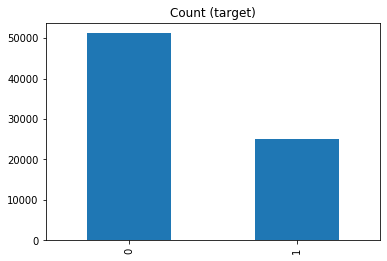

In [4]:
df_class_1_over = df_class_1.sample(25000, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.IsBadBuy.value_counts())

df_test_over.IsBadBuy.value_counts().plot(kind='bar', title='Count (target)');

frames=[df_class_1_over,df_class_0]
dftraining=pd.concat(frames)

In [5]:
from sklearn.preprocessing import OneHotEncoder
le =LabelEncoder()
df['IsBadBuy'] = le.fit_transform(df['IsBadBuy'])
df['IsOnlineSale']=le.fit_transform(df['IsOnlineSale'])
df['Auction'] = le.fit_transform(df['Auction'])
df['Make'] = le.fit_transform(df['Make'])
df['Model'] = le.fit_transform(df['Model'])
df['Trim'] = le.fit_transform(df['Trim'])
df['SubModel'] = le.fit_transform(df['SubModel'])
df['Color'] = le.fit_transform(df['Color'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df['WheelType'] = le.fit_transform(df['WheelType'])
df['Nationality'] = le.fit_transform(df['Nationality'])
df['Size'] = le.fit_transform(df['Size'])
df['TopThreeAmericanName'] = le.fit_transform(df['TopThreeAmericanName'])
df['VNST'] = le.fit_transform(df['VNST'])
df['VNZIP1']=le.fit_transform(df['VNZIP1'])

#----------------------------------------------------TEST----------------------------------------------------------------------


dt['IsBadBuy'] = le.fit_transform(dt['IsBadBuy'])
dt['IsOnlineSale']=le.fit_transform(dt['IsOnlineSale'])
dt['Auction'] = le.fit_transform(dt['Auction'])
dt['Make'] = le.fit_transform(dt['Make'])
dt['Model'] = le.fit_transform(dt['Model'])
dt['Trim'] = le.fit_transform(dt['Trim'])
dt['SubModel'] = le.fit_transform(dt['SubModel'])
dt['Color'] = le.fit_transform(dt['Color'])
dt['Transmission'] = le.fit_transform(dt['Transmission'])
dt['WheelType'] = le.fit_transform(dt['WheelType'])
dt['Nationality'] = le.fit_transform(dt['Nationality'])
dt['Size'] = le.fit_transform(dt['Size'])
dt['TopThreeAmericanName'] = le.fit_transform(dt['TopThreeAmericanName'])
dt['VNST'] = le.fit_transform(dt['VNST'])
dt['VNZIP1']=le.fit_transform(dt['VNZIP1'])

In [6]:
attributes = [col for col in df.columns if col != 'IsBadBuy']
X_train = df[attributes].values
y_train=df['IsBadBuy']

X_test = dt[attributes].values
y_test = dt['IsBadBuy']

In [7]:
#DUMMY CLASSIFIER (strategy = stratified, training)
from sklearn.dummy import DummyClassifier
dclf = DummyClassifier(strategy = 'stratified', random_state = 0) 
dclf.fit(X_train, y_train) 

y_pred_dummy = dclf.predict(X_train)
print('Accuracy %s' % accuracy_score(y_train, y_pred_dummy))
print('F1-score %s' % f1_score(y_train, y_pred_dummy, average=None))
print(classification_report(y_train, y_pred_dummy))
confusion_matrix(y_train, y_pred_dummy)

Accuracy 0.7836842375755915
F1-score [0.87669547 0.11951747]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     51166
           1       0.12      0.12      0.12      7207

    accuracy                           0.78     58373
   macro avg       0.50      0.50      0.50     58373
weighted avg       0.78      0.78      0.78     58373



array([[44889,  6277],
       [ 6350,   857]], dtype=int64)

In [8]:
#DUMMY CLASSIFIER (strategy = stratified, test)
from sklearn.dummy import DummyClassifier
dclf = DummyClassifier(strategy = 'stratified', random_state = 0) 
dclf.fit(X_train, y_train) 

y_pred_dummy = dclf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred_dummy))
print('F1-score %s' % f1_score(y_test, y_pred_dummy, average=None))
print(classification_report(y_test, y_pred_dummy))
confusion_matrix(y_test, y_pred_dummy)

Accuracy 0.7848430861998081
F1-score [0.87751599 0.11599099]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12826
           1       0.12      0.12      0.12      1768

    accuracy                           0.78     14594
   macro avg       0.50      0.50      0.50     14594
weighted avg       0.79      0.78      0.79     14594



array([[11248,  1578],
       [ 1562,   206]], dtype=int64)

In [9]:
#DUMMY CLASSIFIER (strategy = most_frequent, training)
from sklearn.dummy import DummyClassifier
d_mf_clf = DummyClassifier(strategy = 'most_frequent', random_state = 0) 
d_mf_clf.fit(X_train, y_train) 

y_pred_dummy_most_frequent = d_mf_clf.predict(X_train)
print('Accuracy %s' % accuracy_score(y_train, y_pred_dummy_most_frequent))
print('F1-score %s' % f1_score(y_train, y_pred_dummy_most_frequent, average=None))
print(classification_report(y_train, y_pred_dummy_most_frequent))
confusion_matrix(y_train, y_pred_dummy_most_frequent)

Accuracy 0.8765353845099618
F1-score [0.93420608 0.        ]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     51166
           1       0.00      0.00      0.00      7207

    accuracy                           0.88     58373
   macro avg       0.44      0.50      0.47     58373
weighted avg       0.77      0.88      0.82     58373



C:\Users\andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[51166,     0],
       [ 7207,     0]], dtype=int64)

In [10]:
#DUMMY CLASSIFIER (strategy = most_frequent, test)
from sklearn.dummy import DummyClassifier
d_mf_clf = DummyClassifier(strategy = 'most_frequent', random_state = 0) 
d_mf_clf.fit(X_train, y_train) 

y_pred_dummy_most_frequent = d_mf_clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred_dummy_most_frequent))
print('F1-score %s' % f1_score(y_test, y_pred_dummy_most_frequent, average=None))
print(classification_report(y_test, y_pred_dummy_most_frequent))
confusion_matrix(y_test, y_pred_dummy_most_frequent)

Accuracy 0.8788543236946691
F1-score [0.93552152 0.        ]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     12826
           1       0.00      0.00      0.00      1768

    accuracy                           0.88     14594
   macro avg       0.44      0.50      0.47     14594
weighted avg       0.77      0.88      0.82     14594



array([[12826,     0],
       [ 1768,     0]], dtype=int64)

In [11]:
#1)Cerco i migliori pesi con min_sample_split e min_sample_leaf fissati ad un valore arbitrario

In [12]:
#i e' il peso dato a IsBadBuy = 0
#j e' il peso dato a IsBadBuy = 1

for i in range(10,150,2):
    clf = DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=210, min_samples_leaf=100, class_weight = {0:1, 1:i/10})
    clf.fit(X_train, y_train)
    X=X_train
    y=y_train
    y_pred = clf.predict(X_train)
    print('i = ', i)
    print(classification_report(y_train, y_pred))
    y_pred = clf.predict(X_test)
    print('----------------------------------------')
    print(classification_report(y_test, y_pred))
    print('=========================================')

i =  10
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     51166
           1       0.88      0.23      0.36      7207

    accuracy                           0.90     58373
   macro avg       0.89      0.61      0.65     58373
weighted avg       0.90      0.90      0.87     58373

----------------------------------------
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12826
           1       0.89      0.21      0.34      1768

    accuracy                           0.90     14594
   macro avg       0.90      0.60      0.64     14594
weighted avg       0.90      0.90      0.87     14594

i =  12
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     51166
           1       0.83      0.24      0.38      7207

    accuracy                           0.90     58373
   macro avg       0.87      0.62      0.66     58373
weighted avg     

i =  32
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     51166
           1       0.47      0.45      0.46      7207

    accuracy                           0.87     58373
   macro avg       0.70      0.69      0.69     58373
weighted avg       0.87      0.87      0.87     58373

----------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     12826
           1       0.37      0.36      0.37      1768

    accuracy                           0.85     14594
   macro avg       0.64      0.64      0.64     14594
weighted avg       0.85      0.85      0.85     14594

i =  34
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     51166
           1       0.45      0.48      0.46      7207

    accuracy                           0.86     58373
   macro avg       0.69      0.70      0.69     58373
weighted avg     

i =  54
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     51166
           1       0.32      0.69      0.43      7207

    accuracy                           0.78     58373
   macro avg       0.63      0.74      0.65     58373
weighted avg       0.87      0.78      0.81     58373

----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.76      0.83     12826
           1       0.24      0.54      0.33      1768

    accuracy                           0.73     14594
   macro avg       0.58      0.65      0.58     14594
weighted avg       0.84      0.73      0.77     14594

i =  56
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     51166
           1       0.31      0.69      0.43      7207

    accuracy                           0.78     58373
   macro avg       0.63      0.74      0.65     58373
weighted avg     

i =  76
              precision    recall  f1-score   support

           0       0.96      0.71      0.81     51166
           1       0.27      0.78      0.41      7207

    accuracy                           0.72     58373
   macro avg       0.62      0.74      0.61     58373
weighted avg       0.87      0.72      0.76     58373

----------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.68      0.79     12826
           1       0.21      0.63      0.32      1768

    accuracy                           0.67     14594
   macro avg       0.57      0.65      0.55     14594
weighted avg       0.84      0.67      0.73     14594

i =  78
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     51166
           1       0.27      0.79      0.40      7207

    accuracy                           0.71     58373
   macro avg       0.61      0.74      0.60     58373
weighted avg     

i =  98
              precision    recall  f1-score   support

           0       0.97      0.63      0.76     51166
           1       0.24      0.85      0.38      7207

    accuracy                           0.65     58373
   macro avg       0.60      0.74      0.57     58373
weighted avg       0.88      0.65      0.71     58373

----------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.60      0.73     12826
           1       0.19      0.67      0.29      1768

    accuracy                           0.61     14594
   macro avg       0.56      0.64      0.51     14594
weighted avg       0.84      0.61      0.68     14594

i =  100
              precision    recall  f1-score   support

           0       0.97      0.63      0.76     51166
           1       0.24      0.85      0.38      7207

    accuracy                           0.65     58373
   macro avg       0.60      0.74      0.57     58373
weighted avg    

i =  120
              precision    recall  f1-score   support

           0       0.97      0.57      0.72     51166
           1       0.23      0.89      0.36      7207

    accuracy                           0.61     58373
   macro avg       0.60      0.73      0.54     58373
weighted avg       0.88      0.61      0.67     58373

----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.55      0.69     12826
           1       0.18      0.73      0.29      1768

    accuracy                           0.57     14594
   macro avg       0.56      0.64      0.49     14594
weighted avg       0.85      0.57      0.65     14594

i =  122
              precision    recall  f1-score   support

           0       0.97      0.56      0.71     51166
           1       0.22      0.89      0.36      7207

    accuracy                           0.61     58373
   macro avg       0.60      0.73      0.54     58373
weighted avg   

i =  142
              precision    recall  f1-score   support

           0       0.98      0.51      0.67     51166
           1       0.21      0.92      0.34      7207

    accuracy                           0.56     58373
   macro avg       0.59      0.72      0.51     58373
weighted avg       0.88      0.56      0.63     58373

----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.49      0.64     12826
           1       0.17      0.76      0.28      1768

    accuracy                           0.52     14594
   macro avg       0.55      0.62      0.46     14594
weighted avg       0.84      0.52      0.60     14594

i =  144
              precision    recall  f1-score   support

           0       0.98      0.52      0.68     51166
           1       0.21      0.92      0.34      7207

    accuracy                           0.57     58373
   macro avg       0.59      0.72      0.51     58373
weighted avg   

In [27]:
#2)Decido quale peso adottare secondo ragionevolezza (non appena Recall piu' o meno si equivale a precision),
#e rilancio il DT con questi parametri

In [14]:
clf = DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=210, min_samples_leaf=100, class_weight = {0:1, 1:3.4})
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 3.4}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=210,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
#3)Ora che ho i pesi piu' ragionevoli, trovo i migliori min_sample_split e min_sample_leaf e stampo tutti i risultati

In [16]:
X=X_train
y=y_train

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [18]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [19]:
param_list = {'min_samples_split': [ 10, 15, 20, 30, 40 ,50 ,60 ,70,80 ,90 ,100 ,110,130, 150 , 170 ,190, 210],
              'min_samples_leaf': [10, 15, 20 ,30, 35 ,40,45 ,50,55, 60, 65 ,70,80,100],
             }

grid_search = GridSearchCV(clf, param_grid=param_list)
grid_search.fit(X, y)
clf = grid_search.best_estimator_
clf

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight={0: 1, 1: 3.4}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=210,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
report(grid_search.cv_results_, n_top=7)

Mean validation score: 0.83739 (std: 0.00218)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 210}

Mean validation score: 0.83677 (std: 0.00607)
Parameters: {'min_samples_leaf': 60, 'min_samples_split': 210}

Mean validation score: 0.83676 (std: 0.00216)
Parameters: {'min_samples_leaf': 80, 'min_samples_split': 210}

Mean validation score: 0.83609 (std: 0.00122)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 20}

Mean validation score: 0.83609 (std: 0.00122)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 30}

Mean validation score: 0.83609 (std: 0.00122)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 50}

Mean validation score: 0.83609 (std: 0.00122)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 60}

Mean validation score: 0.83609 (std: 0.00122)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 70}

Mean validation score: 0.83609 (std: 0.00122)
Parameters: {'min_samples_leaf': 100, 'min_samples_split': 80}

Mean vali

In [21]:
zip1 = zip(attributes, clf.feature_importances_)
res = sorted(zip1, key = lambda x: x[1])
for col, imp in res:
    print(col, imp)

Transmission 0.0
Nationality 0.0
IsOnlineSale 0.0
CurrentAveragePrice 0.0
DiffAcquisitionAuctionAverage2 9.215621263422921e-05
TopThreeAmericanName 0.0008174977540004823
MMRAcquisitonRetailCleanPrice 0.0008562044023672522
DiffVehBACQUISITIONAuctionClean 0.001032649877551805
DiffAcquisitionAuctionAverage3 0.0013120945300196742
DiffAcquisitionRetailClean1 0.0014195415327301634
MMRCurrentRetailAveragePrice 0.0015944027763643736
VehYear 0.0016050276321395629
DiffVehBACQUISITIONRetailClean 0.0016334141507672556
Auction 0.0016616703926798895
Color 0.0021117530666262675
DiffVehBCURRENTAuctionClean 0.002236425461565886
DiffAcquisitionRetailClean2 0.002278351205017808
DiffAcquisitionRetailClean3 0.002330383003110755
DiffVehBCURRENTRetailClean 0.0024986305580158
DiffVehBCURRENTRetailAverage 0.0025462395938734505
DiffAcquisitionRetailClean4 0.0027295082408668276
WarrantyCost 0.0028316282314069523
DiffAcquisitionAuctionClean6 0.002858523001178393
MMRCurrentRetailCleanPrice 0.0029153361411989134
Si

In [22]:
y_pred = clf.predict(X_train)
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))
confusion_matrix(y_train, y_pred)

Accuracy 0.8631901735391363
F1-score [0.92160443 0.46323431]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     51166
           1       0.45      0.48      0.46      7207

    accuracy                           0.86     58373
   macro avg       0.69      0.70      0.69     58373
weighted avg       0.87      0.86      0.87     58373



array([[46941,  4225],
       [ 3761,  3446]], dtype=int64)

In [23]:
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.8419898588461011
F1-score [0.90979502 0.36368653]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     12826
           1       0.36      0.37      0.36      1768

    accuracy                           0.84     14594
   macro avg       0.63      0.64      0.64     14594
weighted avg       0.85      0.84      0.84     14594



array([[11629,  1197],
       [ 1109,   659]], dtype=int64)

In [28]:
import pydotplus
from sklearn import tree
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=["GOOD", "BAD"],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth = 5)  
graph = pydotplus.graph_from_dot_data(dot_data) 

In [29]:
fig = Image(graph.create_png(), format='jpeg')

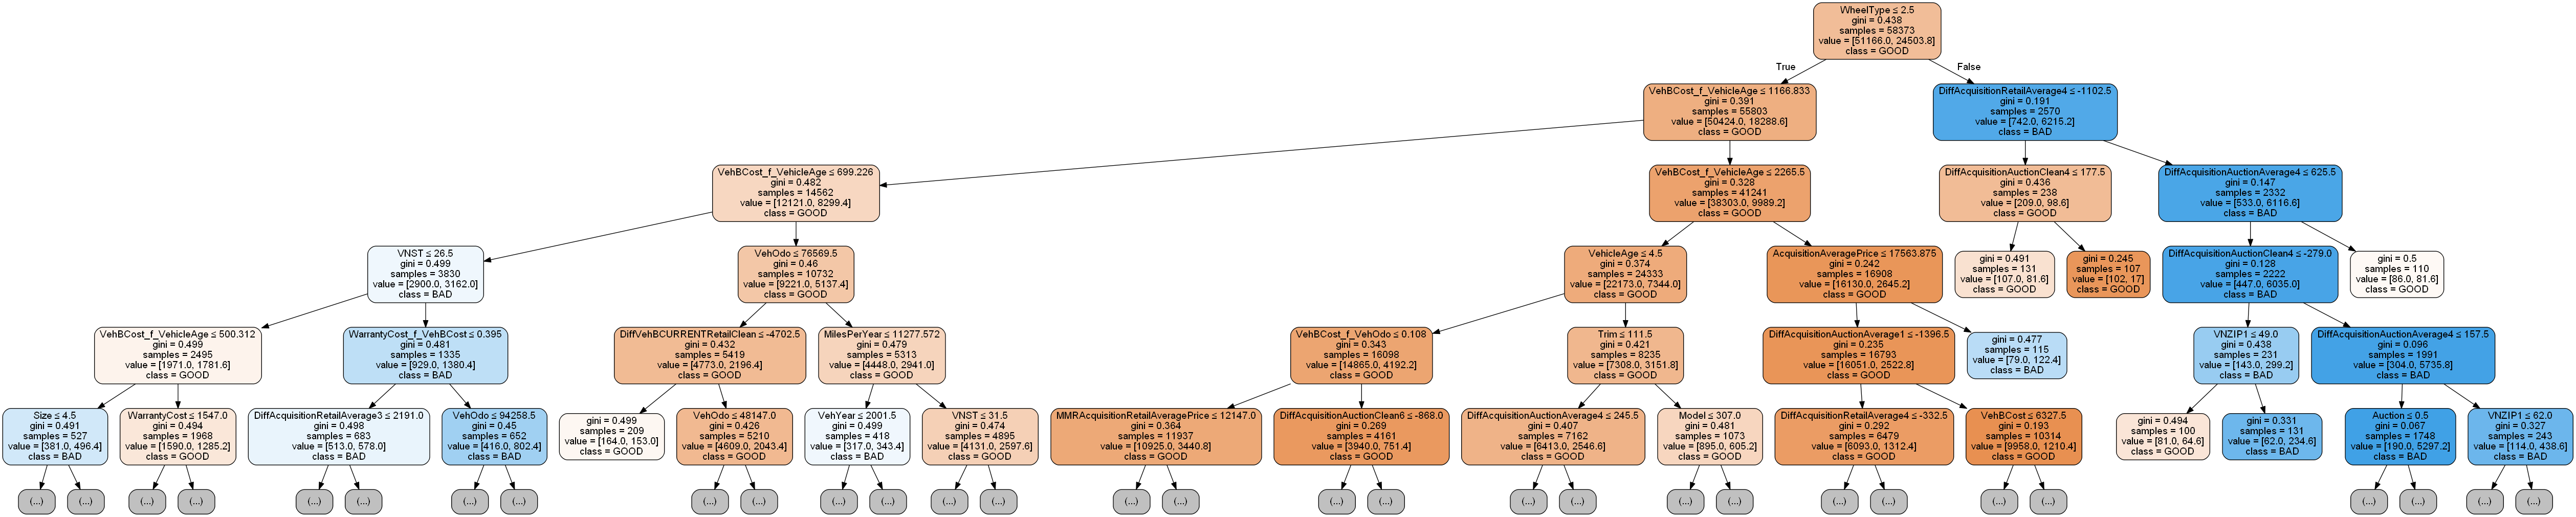

In [30]:
fig